In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import json
from datadict import SOL
from stolen import equi
from operator import itemgetter

In [3]:
probes = {d['id']: d for d in json.load(open('20170130.json'))['objects']}

In [4]:
dat = pd.read_csv('./uniq_speedy_probes.txt', names='msm_id prb_id src srclat srclon dst dstlat dstlon distance light rtt first'.split(), sep=' ')

In [5]:
dat.head()

,msm_id,prb_id,src,srclat,srclon,dst,dstlat,dstlon,distance,light,rtt,first
0,1042408,10007,76.103.162.14,38.3305,-122.3325,80.94.66.70,40.7095,-74.0115,4100,39.6,14.635000,NaN
1,1446417,1001,114.198.116.142,38.9775,-76.4925,120.29.255.85,-37.8105,144.9595,16431,158.9,30.968000,1.213
2,1963440,1001,114.198.116.142,38.9775,-76.4925,203.133.248.18,-27.4705,153.0295,15295,147.9,36.978440,NaN
3,1963440,1001,114.198.118.192,38.9775,-76.4925,203.133.248.18,-27.4705,153.0295,15295,147.9,34.465544,NaN
4,1446417,1001,121.45.196.112,38.9775,-76.4925,120.29.255.85,-37.8105,144.9595,16431,158.9,27.842000,1.203


In [6]:
def plotprob(src_prb_id):
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    # setup mercator map projection.
    m = Basemap(llcrnrlon=-170., llcrnrlat=-60., urcrnrlon=170., urcrnrlat=84.,
                rsphere=(6378137.00,6356752.3142),
                resolution='l', projection='merc',
                lat_0=0., lon_0=0., lat_ts=20.)
    src_dat = dat[dat.prb_id == src_prb_id]
    print 'https://atlas.ripe.net/probes/{}/'.format(src_prb_id)
    print itemgetter('is_public', 'address_v4', 'prefix_v4', 'latitude', 'longitude')(probes[src_prb_id])
    for row in src_dat.itertuples():
        m.drawgreatcircle(row.srclon, row.srclat, row.dstlon, row.dstlat, linewidth=1, color='b')
        equi(m, row.dstlon, row.dstlat, row.distance / 5) # ugly hack for visualisation
    m.drawcoastlines()
    ax.set_title('From probe #{:d}'.format(src_prb_id))
    plt.show()

In [7]:
vc = dat.prb_id.value_counts()
vc.head(15)

10790    33
1001     10
13526    10
16018    10
10125     8
13521     8
2592      7
14635     6
3187      6
19712     6
17958     5
1419      4
4825      4
23333     4
3185      4
Name: prb_id, dtype: int64

https://atlas.ripe.net/probes/10790/
(True, u'108.41.158.66', u'108.41.0.0/16', 39.7375, -104.9785)


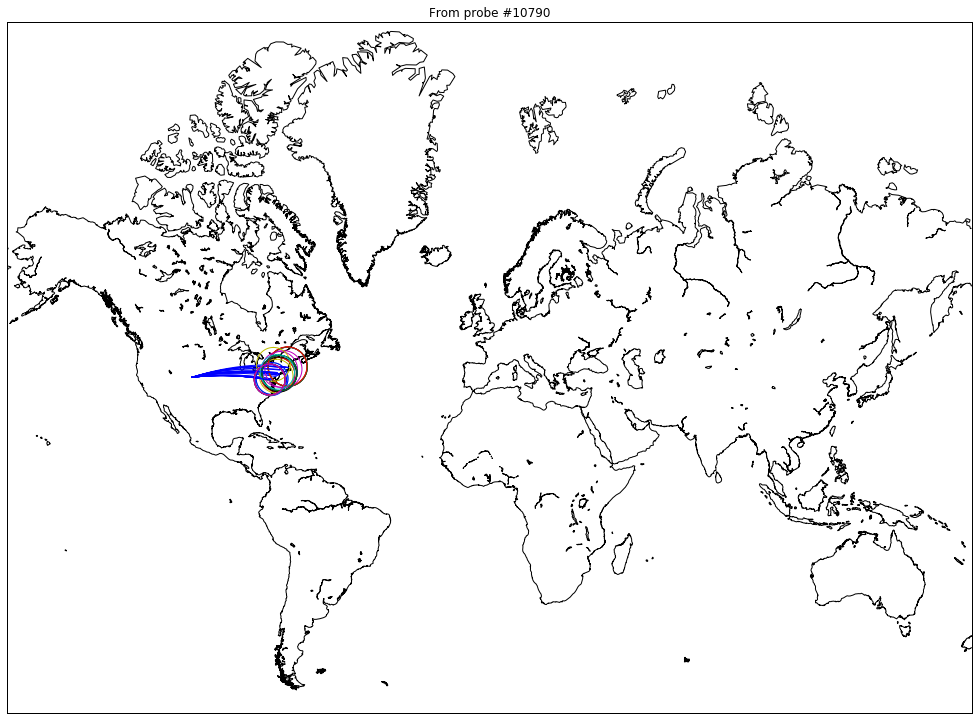

https://atlas.ripe.net/probes/1001/
(True, u'108.3.164.129', u'108.3.128.0/17', 38.9775, -76.4925)


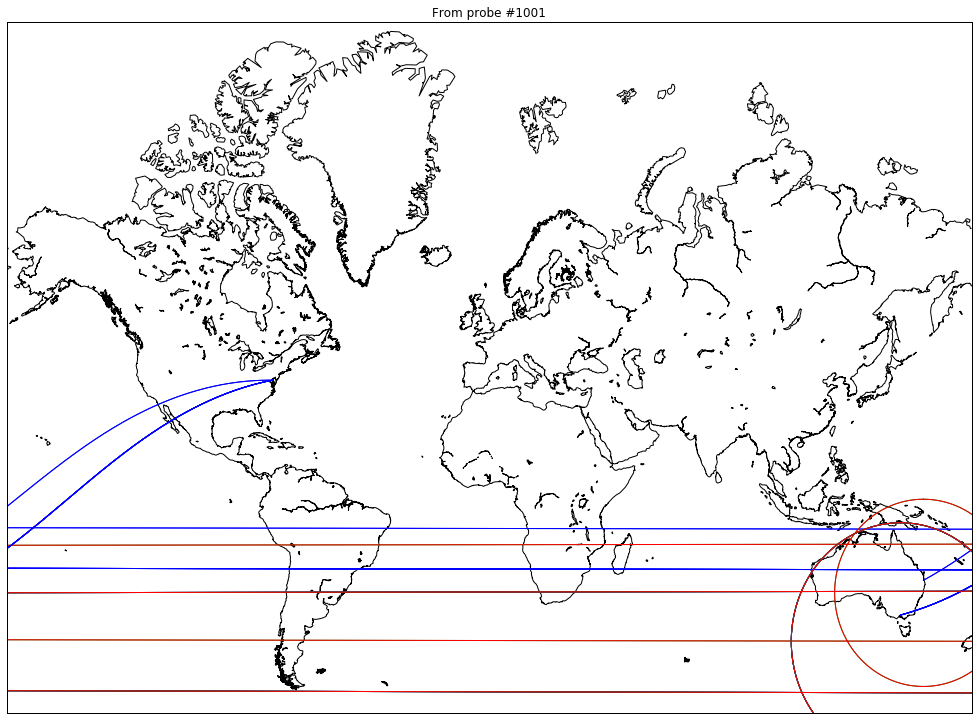

https://atlas.ripe.net/probes/13526/
(False, None, u'208.69.34.0/24', 37.7705, -122.3915)


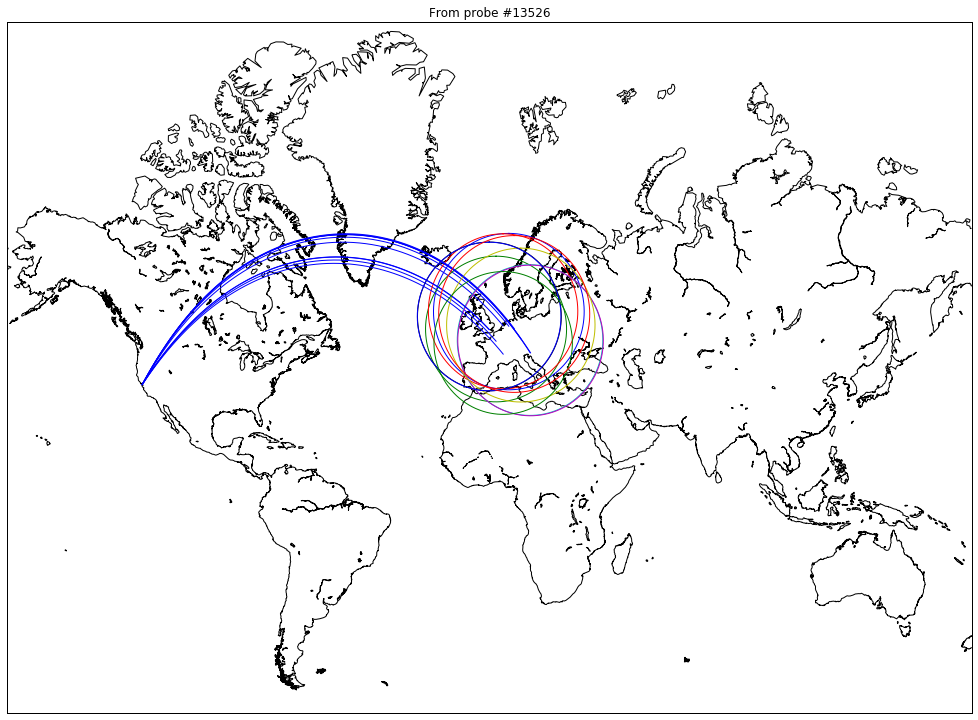

https://atlas.ripe.net/probes/16018/
(True, u'66.96.199.42', u'66.96.199.0/24', 1.2915, 103.8575)


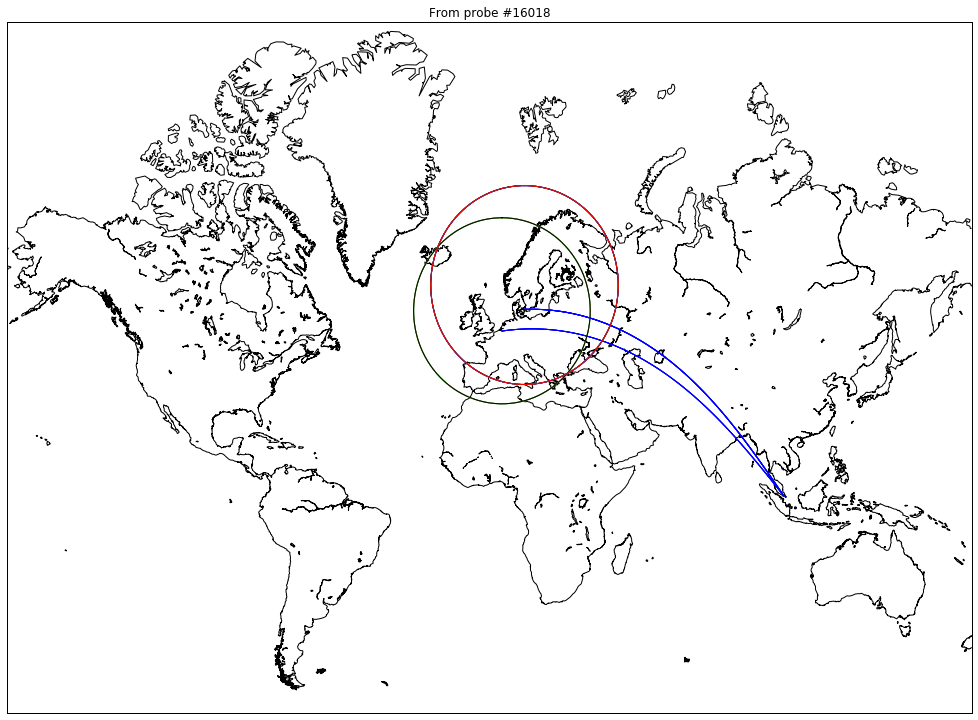

https://atlas.ripe.net/probes/10125/
(True, u'173.226.66.172', u'173.226.0.0/15', 37.0895, -95.7115)


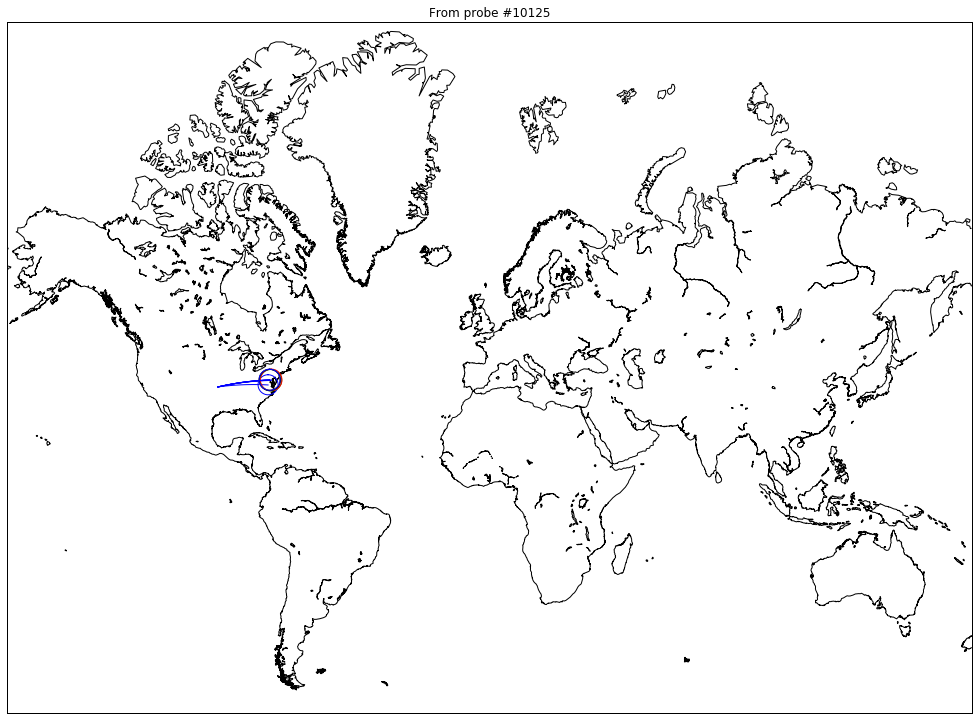

https://atlas.ripe.net/probes/13521/
(False, None, u'208.69.35.0/24', 37.7675, -122.3915)


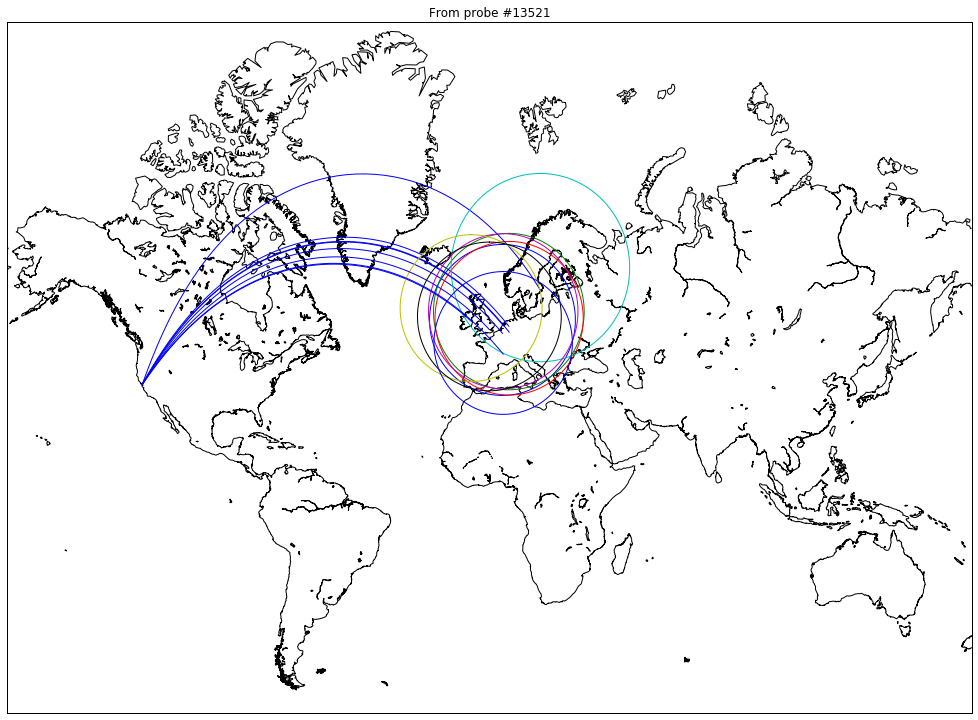

https://atlas.ripe.net/probes/2592/
(True, u'174.61.236.26', u'174.48.0.0/12', 47.6085, -122.3285)


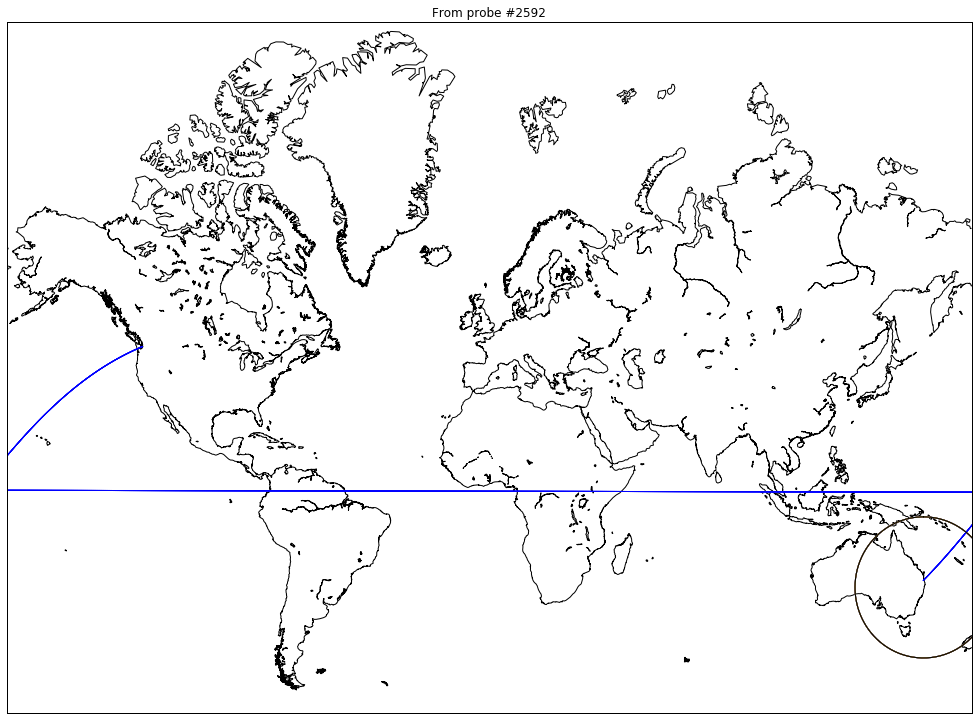

https://atlas.ripe.net/probes/14635/
(True, u'189.6.250.80', u'189.6.224.0/19', -30.0205, -51.1915)


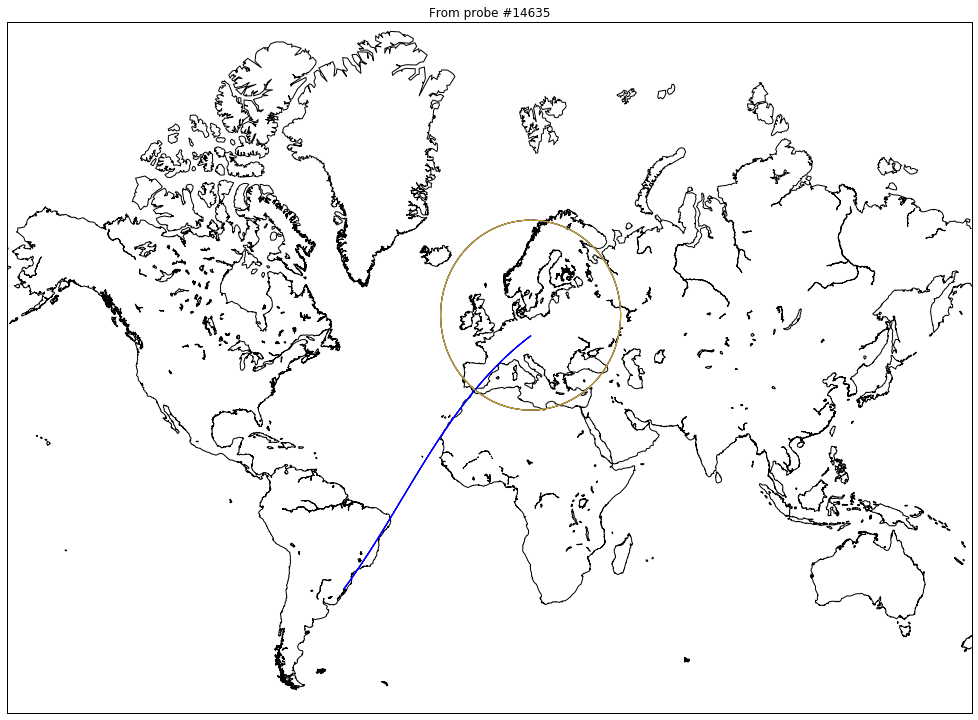

https://atlas.ripe.net/probes/3187/
(True, u'85.179.181.198', u'85.176.0.0/13', 53.5405, 10.2215)


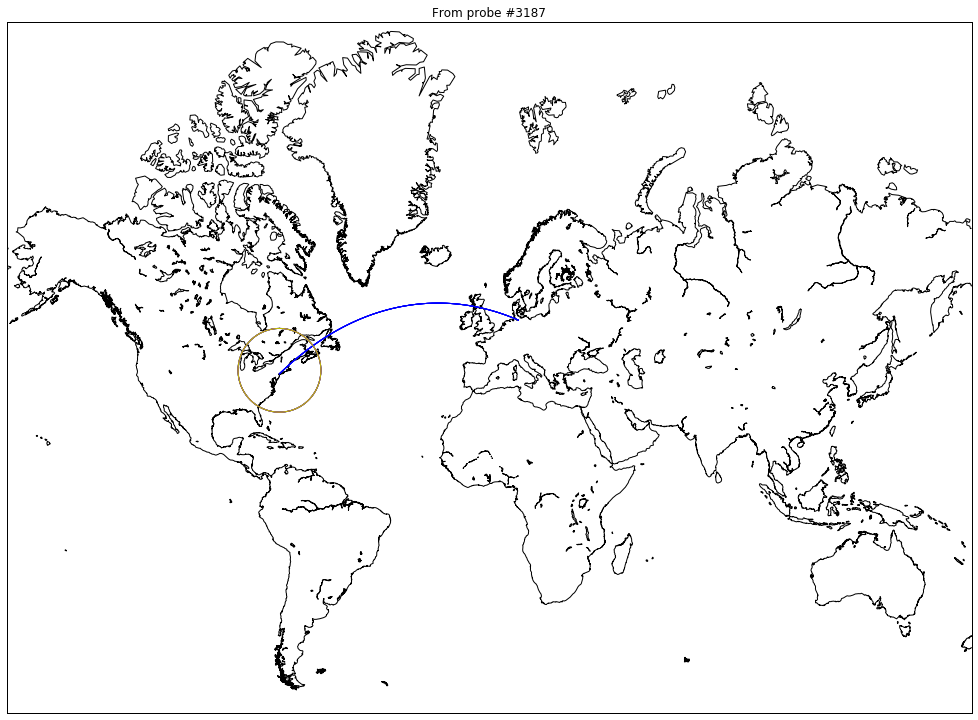

https://atlas.ripe.net/probes/19712/
(True, u'113.197.2.35', u'113.197.0.0/20', -27.5615, 153.0775)


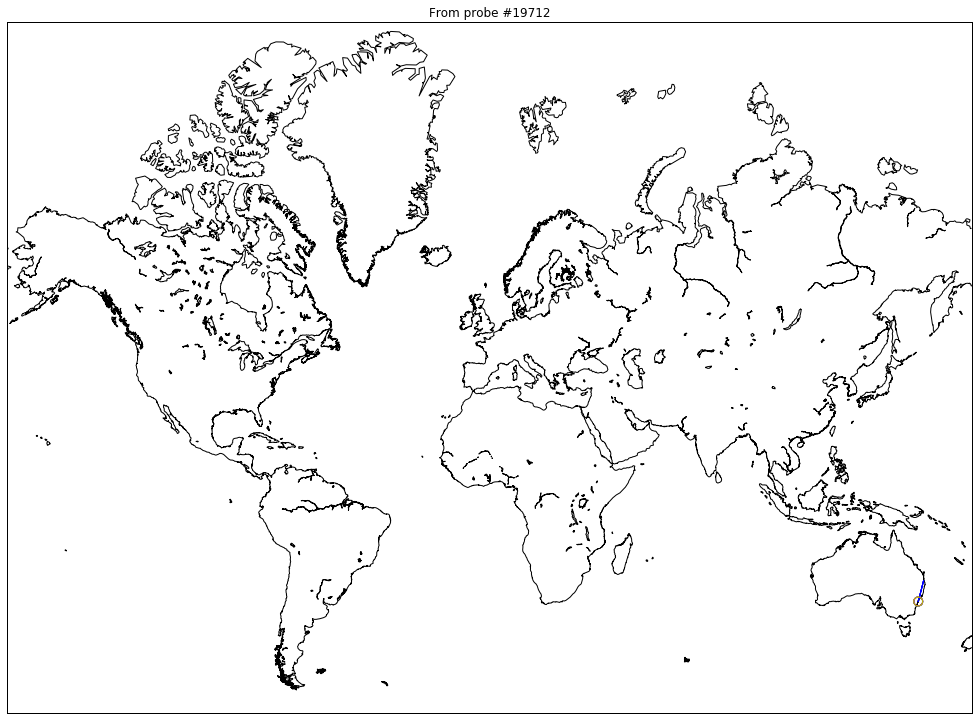

https://atlas.ripe.net/probes/17958/
(False, None, u'176.24.0.0/14', 51.0415, -2.8305)


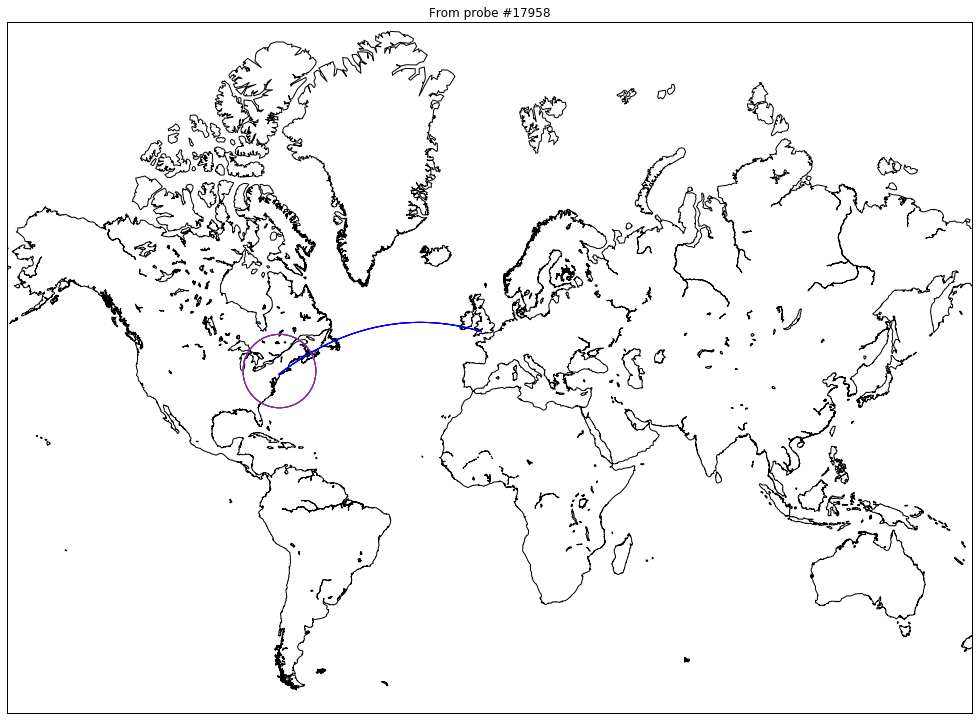

In [8]:
for no in vc[vc >= 5].index:
    plotprob(no)